## Import Libraries

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

## Load Features

In [4]:
# Export feature table to file
feature_df = pd.read_csv("../Data/Features/features_191205.csv",index_col=0)
feature_df

,HomeTeam,AwayTeam,Date,Season,Div,FTR,home_prev_3_result,home_prev_3_win,home_prev_3_loss,home_prev_3_draw,...,x5_LWW,x5_WDD,x5_WDL,x5_WDW,x5_WLD,x5_WLL,x5_WLW,x5_WWD,x5_WWL,x5_WWW
6828,Arsenal,Leicester,2017-08-11,1718,E0,H,WWW,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6829,Brighton,Man City,2017-08-12,1718,E0,A,DLL,0,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6830,Chelsea,Burnley,2017-08-12,1718,E0,A,WWW,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6831,Crystal Palace,Huddersfield,2017-08-12,1718,E0,A,LWL,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6832,Everton,Stoke,2017-08-12,1718,E0,H,LWL,1,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44760,Liverpool,Middlesbrough,2017-05-21,1617,E0,H,WDW,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44761,Man United,Crystal Palace,2017-05-21,1617,E0,H,DLL,0,2,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
44762,Southampton,Stoke,2017-05-21,1617,E0,A,DWL,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44763,Swansea,West Brom,2017-05-21,1617,E0,H,WWD,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Check feature data types
dict(feature_df.dtypes)

{'HomeTeam': dtype('O'),
 'AwayTeam': dtype('O'),
 'Date': dtype('O'),
 'Season': dtype('int64'),
 'Div': dtype('O'),
 'FTR': dtype('O'),
 'home_prev_3_result': dtype('O'),
 'home_prev_3_win': dtype('int64'),
 'home_prev_3_loss': dtype('int64'),
 'home_prev_3_draw': dtype('int64'),
 'home_prev_3_win_pct': dtype('float64'),
 'home_prev_3_loss_pct': dtype('float64'),
 'home_prev_3_gd': dtype('float64'),
 'home_prev_3_gc': dtype('float64'),
 'home_prev_3_gs': dtype('float64'),
 'home_prev_3_cs': dtype('int64'),
 'away_prev_3_result': dtype('O'),
 'away_prev_3_win': dtype('int64'),
 'away_prev_3_loss': dtype('int64'),
 'away_prev_3_draw': dtype('int64'),
 'away_prev_3_win_pct': dtype('float64'),
 'away_prev_3_loss_pct': dtype('float64'),
 'away_prev_3_gd': dtype('float64'),
 'away_prev_3_gc': dtype('float64'),
 'away_prev_3_gs': dtype('float64'),
 'away_prev_3_cs': dtype('int64'),
 'x0_Arsenal': dtype('float64'),
 'x0_Bournemouth': dtype('float64'),
 'x0_Brighton': dtype('float64'),
 'x0_B

## Split Training and Test Datasets

In [8]:
num_feature = ['home_prev_3_win','home_prev_3_loss','home_prev_3_draw','home_prev_3_win_pct','home_prev_3_loss_pct','home_prev_3_gd','home_prev_3_gc','home_prev_3_gs','home_prev_3_cs'\
                ,'away_prev_3_win','away_prev_3_loss','away_prev_3_draw','away_prev_3_win_pct','away_prev_3_loss_pct','away_prev_3_gd','away_prev_3_gc','away_prev_3_gs','away_prev_3_cs']
cat_feature = ['HomeTeam','AwayTeam','Season','Div','home_prev_3_result','away_prev_3_result']
remove_feature = ['Date','FTR']
# Split dataset
train_df, test_df = train_test_split(feature_df, test_size=0.2, random_state=42)
# Separate label from data
train_label = train_df['FTR']
test_label = test_df['FTR']
train_df = train_df.drop(remove_feature,axis=1)
test_df = test_df.drop(remove_feature,axis=1)
train_df = train_df.drop(cat_feature,axis=1)
test_df = test_df.drop(cat_feature,axis=1)
print(f"Size of training set: {len(train_df)}\nSize of test set: {len(test_df)}\nNumber of features: {train_df.shape[1]}")

Size of training set: 912
Size of test set: 228
Number of features: 128


## Training Decision Tree Model

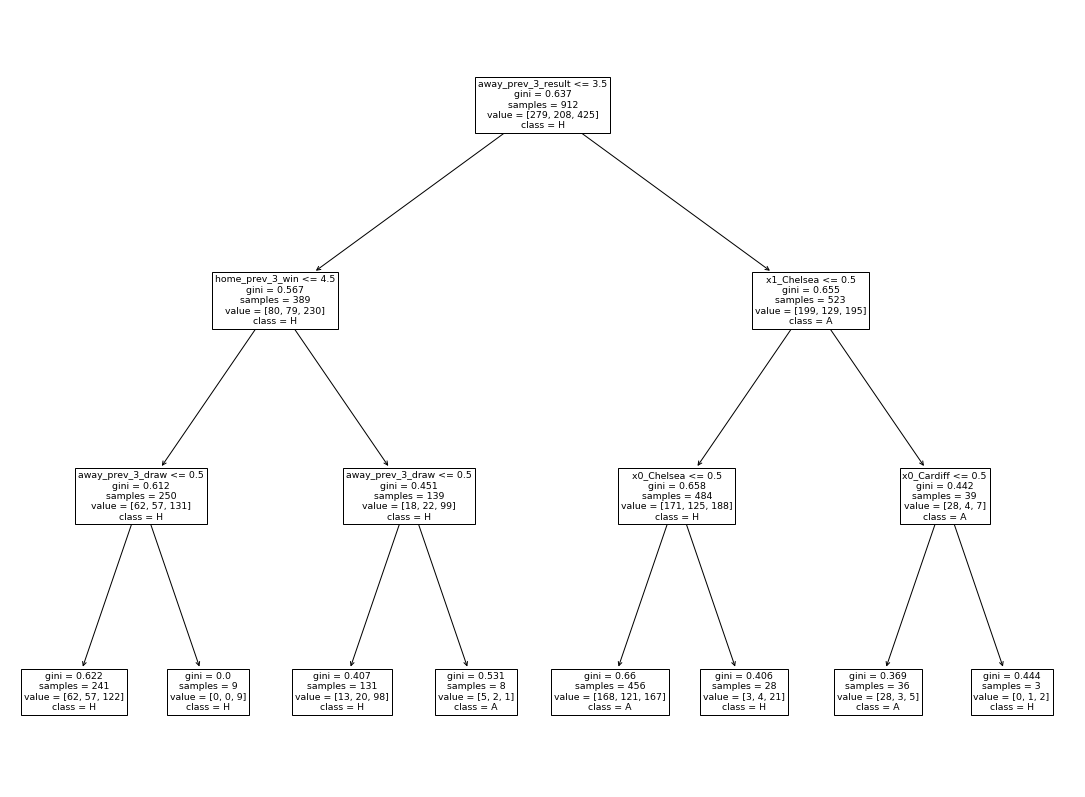

In [10]:
# Train decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(train_df,train_label)
plt.figure(figsize=[6.4*3,4.8*3])
tree.plot_tree(clf,feature_names=feature_df.columns,class_names=clf.classes_)
plt.show()

In [11]:
# Test decision tree classifier
clf.score(test_df,test_label)

0.4868421052631579